In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
# Retrieve inputs
%store -r X_motion_01
%store -r X_motion_02
%store -r X_motion_03
%store -r X_motion_04
%store -r X_motion_05
%store -r X_motion_06
%store -r X_motion_07
%store -r X_motion_08
%store -r X_motion_09

# Retrieve labels
%store -r Y_motion_01
%store -r Y_motion_02
%store -r Y_motion_03
%store -r Y_motion_04
%store -r Y_motion_05
%store -r Y_motion_06
%store -r Y_motion_07
%store -r Y_motion_08
%store -r Y_motion_09

In [6]:
print(X_motion_01.shape)
print(X_motion_02.shape)
print(X_motion_03.shape)
print(X_motion_04.shape)
print(X_motion_05.shape)
print(X_motion_06.shape)
print(X_motion_07.shape)
print(X_motion_08.shape)
print(X_motion_09.shape)

(691, 10)
(658, 10)
(601, 10)
(618, 10)
(552, 10)
(557, 10)
(597, 10)
(504, 10)
(681, 10)


In [7]:
print(Y_motion_01.shape)
print(Y_motion_02.shape)
print(Y_motion_03.shape)
print(Y_motion_04.shape)
print(Y_motion_05.shape)
print(Y_motion_06.shape)
print(Y_motion_07.shape)
print(Y_motion_08.shape)
print(Y_motion_09.shape)

(691, 8)
(658, 8)
(601, 8)
(618, 8)
(552, 8)
(557, 8)
(597, 8)
(504, 8)
(681, 8)


In [24]:
X_motions = np.concatenate((X_motion_01, X_motion_02, X_motion_03, X_motion_04, X_motion_05, X_motion_06, X_motion_07))
print(X_motions.shape)

(4274, 10)


In [25]:
Y_motions = np.concatenate((Y_motion_01, Y_motion_02, Y_motion_03, Y_motion_04, Y_motion_05, Y_motion_06, Y_motion_07))
print(Y_motions.shape)

(4274, 8)


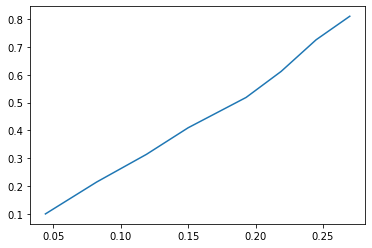

In [26]:
plt.plot([0.044, 0.082, 0.119, 0.15, 0.193, 0.219, 0.245, 0.270], [0.1, 0.214359, 0.313843, 0.409412, 0.518221, 0.611591, 0.725299, 0.809811])

# Multivariate Linear Regression (Foot prediction)

The input will use initially only:

- **HighCmd: fwd, side, rot speeds**
- **HighState: fwd, side, rot speeds, footPosition2Body (FR)**

and as output we seek to predict the following:

- **footPosition2Body (FR)**

In [27]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
def plot_target_and_predictions(title: str, predictions, target):
    fig, ax1 = plt.subplots(1,1, figsize=(15,10))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(range(predictions.shape[0]), predictions, 'b-')
    ax1.set_ylabel('Predictions')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(range(predictions.shape[0]), target, 'g-')
    ax2.set_ylabel('Target', color='g')

    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    
    fig.tight_layout()
    plt.show()

## Predict FR foot (x,y,z)

In [29]:
X_motions[1, :]

array([0.1      , 0.       , 0.       , 0.196707 , 0.0197822, 0.0215766,
       1.       , 0.       , 0.       , 1.       ])

In [30]:
Y_motions[1, :]

array([0.11 , 0.048, 0.   , 0.   , 0.   , 0.   , 0.101, 0.022])

In [50]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((X_motions[:, :3], X_motions[:, 3:6], np.array([X_motions[:, 6]]).T, np.array([X_motions[:, 7]]).T))
print("Input shape: ", X.shape)

np.array([Y_motions[:, 0]]).T

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = Y_motions[:, :2]
print("Labels shape: ", Y.shape)

# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# Create the model
model_fr_full = LinearRegression()

# Fit the model
model_fr_full.fit(X_train, Y_train)

# Predict
predictions = model_fr_full.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# MSE stats
print("The lowest error is: ", np.min(np.linalg.norm(predictions[:, :-1] - Y_test[:, :-1], axis=1)))
print("The highest error is: ", np.max(np.linalg.norm(predictions[:, :-1] - Y_test[:, :-1], axis=1)))
print("The avg. error is: ", np.mean(np.linalg.norm(predictions[:, :-1] - Y_test[:, :-1], axis=1)))
print("The mean squared avg. error between the prediction and groundtruth is: ", mse)
#print("Seq of errors (descendant): \n", sorted(np.linalg.norm(predictions[:, :-1] - Y_test[:, :-1], axis=1).tolist(), reverse=True))

Input shape:  (4274, 8)
Labels shape:  (4274, 2)
Predictions shape:  (1283, 2)
The lowest error is:  6.741244950999453e-05
The highest error is:  0.3188319222024031
The avg. error is:  0.05204028947416824
The mean squared avg. error between the prediction and groundtruth is:  0.006085722598878667


In [36]:
idx = np.where(np.linalg.norm(predictions[:, :-1] - Y_test[:, :-1], axis=1) == np.max(np.linalg.norm(predictions[:, :-1] - Y_test[:, :-1], axis=1)))[0]

In [38]:
print(f'Command: {X_test[idx, 0:3]}. State: {X_test[idx, 3:6]}. Start: {X_test[idx, 6:9]}. Groundtruth: {Y_test[idx]}. Predicted: {predictions[idx]}')

Command: [[0.725299 0.       0.      ]]. State: [[0.330725  0.0103472 0.0131459]]. Start: [[1. 0.]]. Groundtruth: [[0.4904969 0.1142055]]. Predicted: [[0.15967208 0.03886725]]


In [23]:
for idx, prediction in enumerate(predictions):
    print(f'Start: {X_test[idx, 6:9]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

Start: [ 0.262 -0.148 -0.418]. Groundtruth: [ 0.169 -0.121 -0.419]. Predicted: [ 0.17964913 -0.12197745 -0.41933794]
Start: [ 0.234832 -0.116266 -0.41592 ]. Groundtruth: [ 0.23894  -0.151447 -0.411942]. Predicted: [ 0.22384712 -0.14813789 -0.410859  ]
Start: [ 0.247024 -0.109643 -0.403963]. Groundtruth: [ 0.245259 -0.156913 -0.402268]. Predicted: [ 0.22918006 -0.15768561 -0.40203774]
Start: [ 0.255 -0.101 -0.402]. Groundtruth: [ 0.192 -0.199 -0.399]. Predicted: [ 0.20172085 -0.20997193 -0.39572715]
Start: [ 0.235464 -0.142294 -0.412583]. Groundtruth: [ 0.235652 -0.115342 -0.416187]. Predicted: [ 0.23453425 -0.12083765 -0.41327783]
Start: [ 0.346 -0.154 -0.385]. Groundtruth: [ 0.148 -0.125 -0.394]. Predicted: [ 0.15261811 -0.12015792 -0.39423993]
Start: [ 0.382 -0.104 -0.394]. Groundtruth: [ 0.106 -0.114 -0.399]. Predicted: [ 0.09885805 -0.12260766 -0.39635164]
Start: [ 0.11  -0.112 -0.397]. Groundtruth: [ 0.383 -0.11  -0.392]. Predicted: [ 0.38498464 -0.11828063 -0.38995695]
Start: [ 0

In [24]:
plot_target_and_predictions("Predictions vs Target (x)", predictions[:, 0], Y_test[:, 0])

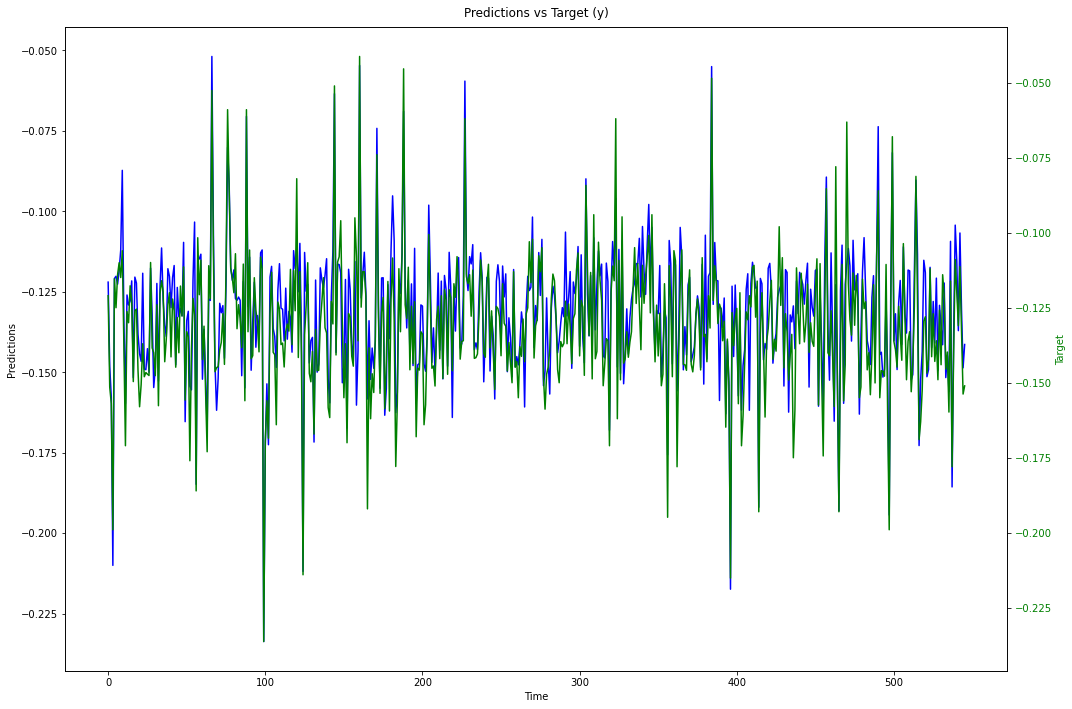

In [25]:
plot_target_and_predictions("Predictions vs Target (y)", predictions[:, 1], Y_test[:, 1])

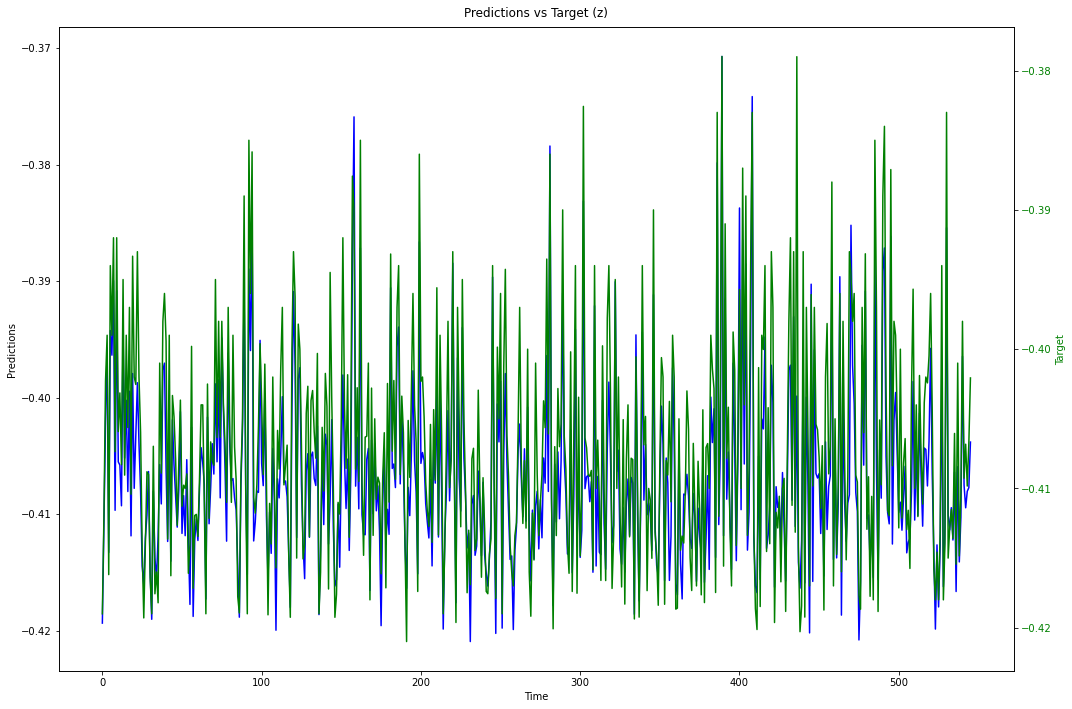

In [26]:
plot_target_and_predictions("Predictions vs Target (z)", predictions[:, 2], Y_test[:, 2])

### Predict FR foot -> x

In [37]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
#X = np.hstack((X_motions[:, :3], X_motions[:, 3:6], np.array([X_motions[:, 6]]).T, np.array([X_motions[:, 9]]).T))
X = np.hstack((X_motions[:, :3], X_motions[:, 3:6], X_motions[:, 6:9], X_motions[:, 9:12]))
print("Input shape: ", X.shape)

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = np.array([Y_motions[:, 0]]).T
print("Labels shape: ", Y.shape)

# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

# Create the model
model_fr_x = LinearRegression()
model_fr_x.fit(X_train, Y_train)

# Fit the model
model_fr_x.fit(X_train, Y_train)

# Predict
predictions = model_fr_x.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# MSE stats
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
print("The mean squared avg. error between the prediction and groundtruth is: ", mse)
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

Input shape:  (5459, 12)
Labels shape:  (5459, 1)
Predictions shape:  (546, 1)
The lowest error is:  0.00010000900890436148
The highest error is:  0.3620334606943353
The avg. error is:  0.06971323947868381
The mean squared avg. error between the prediction and groundtruth is:  0.008601368966972476


In [29]:
for idx, prediction in enumerate(predictions):
    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

Start: 0.262. Groundtruth: [0.169]. Predicted: [0.1806038]
Start: 0.234832. Groundtruth: [0.23894]. Predicted: [0.23090317]
Start: 0.247024. Groundtruth: [0.245259]. Predicted: [0.22697085]
Start: 0.255. Groundtruth: [0.192]. Predicted: [0.19978683]
Start: 0.235464. Groundtruth: [0.235652]. Predicted: [0.2373506]
Start: 0.346. Groundtruth: [0.148]. Predicted: [0.14412298]
Start: 0.382. Groundtruth: [0.106]. Predicted: [0.10238352]
Start: 0.11. Groundtruth: [0.383]. Predicted: [0.38425068]
Start: 0.2439. Groundtruth: [0.241875]. Predicted: [0.23835873]
Start: 0.27. Groundtruth: [0.051]. Predicted: [0.13551865]
Start: 0.218304. Groundtruth: [0.263281]. Predicted: [0.25861873]
Start: 0.234398. Groundtruth: [0.241457]. Predicted: [0.23462859]
Start: 0.253253. Groundtruth: [0.234623]. Predicted: [0.25028916]
Start: 0.322. Groundtruth: [0.171]. Predicted: [0.15927259]
Start: 0.245831. Groundtruth: [0.230083]. Predicted: [0.23239807]
Start: 0.341. Groundtruth: [0.153]. Predicted: [0.1430565]


In [30]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((X_motions[:, :3], X_motions[:, 3:6], np.array([X_motions[:, 7]]).T, np.array([X_motions[:, 10]]).T))
print("Input shape: ", X.shape)

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = np.array([Y_motions[:, 1]]).T
print("Labels shape: ", Y.shape)
# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Create the model
model_fr_y = LinearRegression()

# Fit the model
model_fr_y.fit(X_train, Y_train)

# Predict
predictions = model_fr_y.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# MSE stats
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
print("The mean squared avg. error between the prediction and groundtruth is: ", mse)

Input shape:  (5459, 8)
Labels shape:  (5459, 1)
Predictions shape:  (546, 1)
The lowest error is:  1.6163341222397154e-05
The highest error is:  0.0851816172802514
The avg. error is:  0.008492694551977046
The mean squared avg. error between the prediction and groundtruth is:  0.0001514127086608499


In [31]:
for idx, prediction in enumerate(predictions):
    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

Start: -0.148. Groundtruth: [-0.121]. Predicted: [-0.12816775]
Start: -0.116266. Groundtruth: [-0.151447]. Predicted: [-0.14208758]
Start: -0.109643. Groundtruth: [-0.156913]. Predicted: [-0.1568311]
Start: -0.101. Groundtruth: [-0.199]. Predicted: [-0.2254119]
Start: -0.142294. Groundtruth: [-0.115342]. Predicted: [-0.11823744]
Start: -0.154. Groundtruth: [-0.125]. Predicted: [-0.12488478]
Start: -0.104. Groundtruth: [-0.114]. Predicted: [-0.12698263]
Start: -0.112. Groundtruth: [-0.11]. Predicted: [-0.12506082]
Start: -0.166514. Groundtruth: [-0.114943]. Predicted: [-0.11195273]
Start: -0.175. Groundtruth: [-0.106]. Predicted: [-0.09287422]
Start: -0.138082. Groundtruth: [-0.137156]. Predicted: [-0.12881872]
Start: -0.116188. Groundtruth: [-0.170989]. Predicted: [-0.15589977]
Start: -0.100601. Groundtruth: [-0.126293]. Predicted: [-0.11986573]
Start: -0.135. Groundtruth: [-0.13]. Predicted: [-0.13711676]
Start: -0.14587. Groundtruth: [-0.117694]. Predicted: [-0.12663626]
Start: -0.11

### Predict FR foot -> z

In [32]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((X_motions[:, :3], X_motions[:, 3:6], np.array([X_motions[:, 8]]).T, np.array([X_motions[:, 11]]).T))
print("Input shape: ", X.shape)

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = np.array([Y_motions[:, 2]]).T
print("Labels shape: ", Y.shape)

# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Create the model
model_fr_z = LinearRegression()

# Fit the model
model_fr_z.fit(X_train, Y_train)

# Predict
predictions = model_fr_z.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# MSE stats
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
print("The mean squared avg. error between the prediction and groundtruth is: ", mse)

Input shape:  (5459, 8)
Labels shape:  (5459, 1)
Predictions shape:  (546, 1)
The lowest error is:  1.3341082618190114e-05
The highest error is:  0.020698214389273106
The avg. error is:  0.003504285116902061
The mean squared avg. error between the prediction and groundtruth is:  2.0064704229719878e-05


In [33]:
for idx, prediction in enumerate(predictions):
    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

Start: -0.418. Groundtruth: [-0.419]. Predicted: [-0.41906814]
Start: -0.41592. Groundtruth: [-0.411942]. Predicted: [-0.41235908]
Start: -0.403963. Groundtruth: [-0.402268]. Predicted: [-0.40532212]
Start: -0.402. Groundtruth: [-0.399]. Predicted: [-0.40400639]
Start: -0.412583. Groundtruth: [-0.416187]. Predicted: [-0.41052468]
Start: -0.385. Groundtruth: [-0.394]. Predicted: [-0.39321292]
Start: -0.394. Groundtruth: [-0.399]. Predicted: [-0.39586715]
Start: -0.397. Groundtruth: [-0.392]. Predicted: [-0.39170499]
Start: -0.403429. Groundtruth: [-0.407361]. Predicted: [-0.40603149]
Start: -0.379. Groundtruth: [-0.392]. Predicted: [-0.38913081]
Start: -0.406177. Groundtruth: [-0.405918]. Predicted: [-0.40456168]
Start: -0.410082. Groundtruth: [-0.403142]. Predicted: [-0.40919993]
Start: -0.41161. Groundtruth: [-0.408295]. Predicted: [-0.40939285]
Start: -0.391. Groundtruth: [-0.395]. Predicted: [-0.3971019]
Start: -0.402655. Groundtruth: [-0.409044]. Predicted: [-0.40439711]
Start: -0.